# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('Dataset_clustering.csv')
df = pd.read_csv(
    'Dataset_clustering.csv',
    sep=';',                   
    index_col=0,               
    skipinitialspace=True      
)
df2 = df
df = df.drop(columns='Unnamed: 0', errors='ignore')
df = df.drop(columns='food', errors='ignore')

print(df.columns)
df.head()

Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
       'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E',
       'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese',
       'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density'],
      dtype='object')


,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.1
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.4
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print("Bentuk dataset(Baris,Kolom): ",df.shape)
print("\nJumlah data duplikat: ", df.duplicated().sum())
print("\nMissing value dari masing-masing kolom:\n", df.isnull().sum())
print("\nData Info:")
df.info()

print("\nStatistik Deskriptif: \n")
df.describe()


Bentuk dataset(Baris,Kolom):  (2503, 34)

Jumlah data duplikat:  109

Missing value dari masing-masing kolom:
 Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,...,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,221.626848,10.196781,3.831395,4.185044,2.240493,18.476675,4.601522,13.045509,2.246145,59.490008,...,0.193170,51.698009,9.257169,1.831473,35.311326,5.194870,154.790667,301.307225,50.598928,1.552002
std,379.523174,28.742637,19.109350,12.835457,7.288412,29.050336,13.413152,31.709701,5.397374,377.155769,...,3.375143,116.256147,68.415866,5.072938,73.905355,20.578679,330.556359,583.989069,195.604704,4.847068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.300000,0.060000,0.055000,0.069000,0.500000,0.000000,0.700000,0.000000,0.000000,...,0.000000,0.600000,0.040000,0.099500,1.500000,0.037000,0.750000,26.350000,0.015000,0.055000
50%,116.000000,2.000000,0.500000,0.500000,0.400000,7.100000,0.088000,3.300000,0.200000,0.000000,...,0.003000,13.800000,0.100000,0.600000,10.500000,0.200000,41.100000,110.600000,0.052000,0.300000
75%,254.500000,9.400000,2.600000,3.450000,1.700000,24.950000,3.300000,12.800000,2.200000,23.100000,...,0.063500,48.000000,0.500000,1.800000,37.050000,0.700000,167.800000,337.650000,0.089000,1.200000
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,166.400000,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000


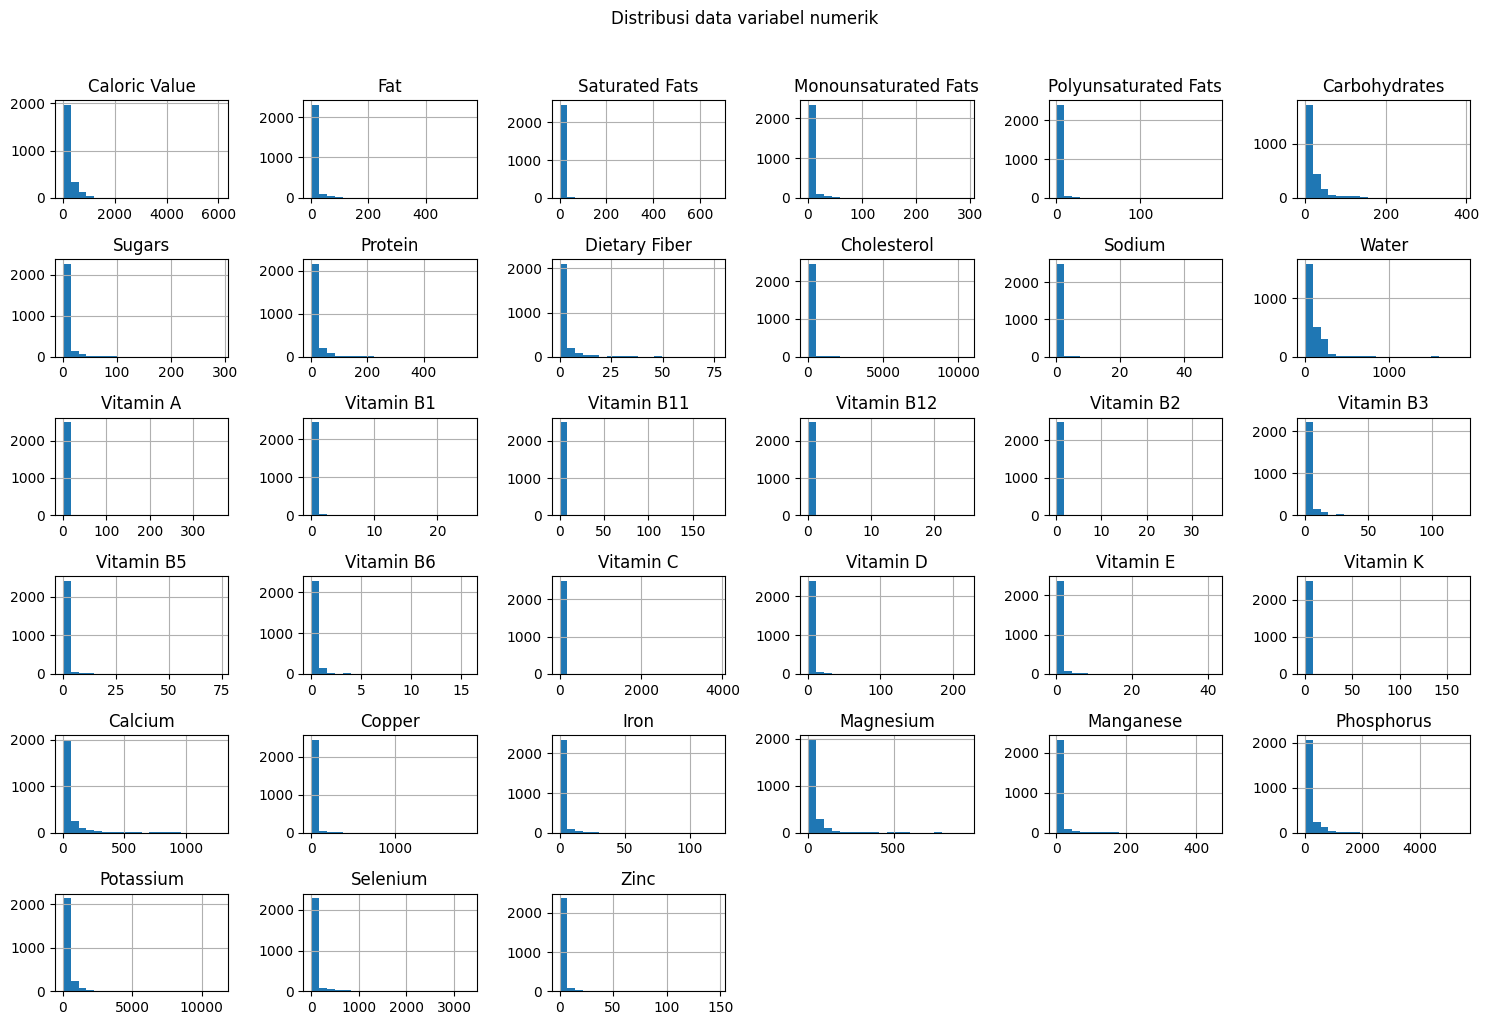

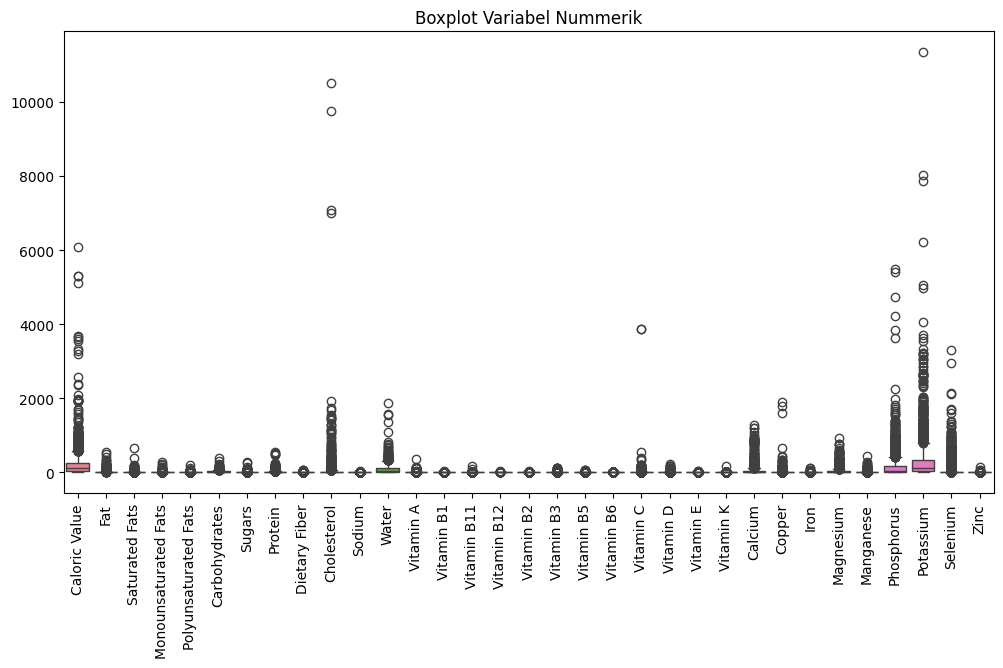

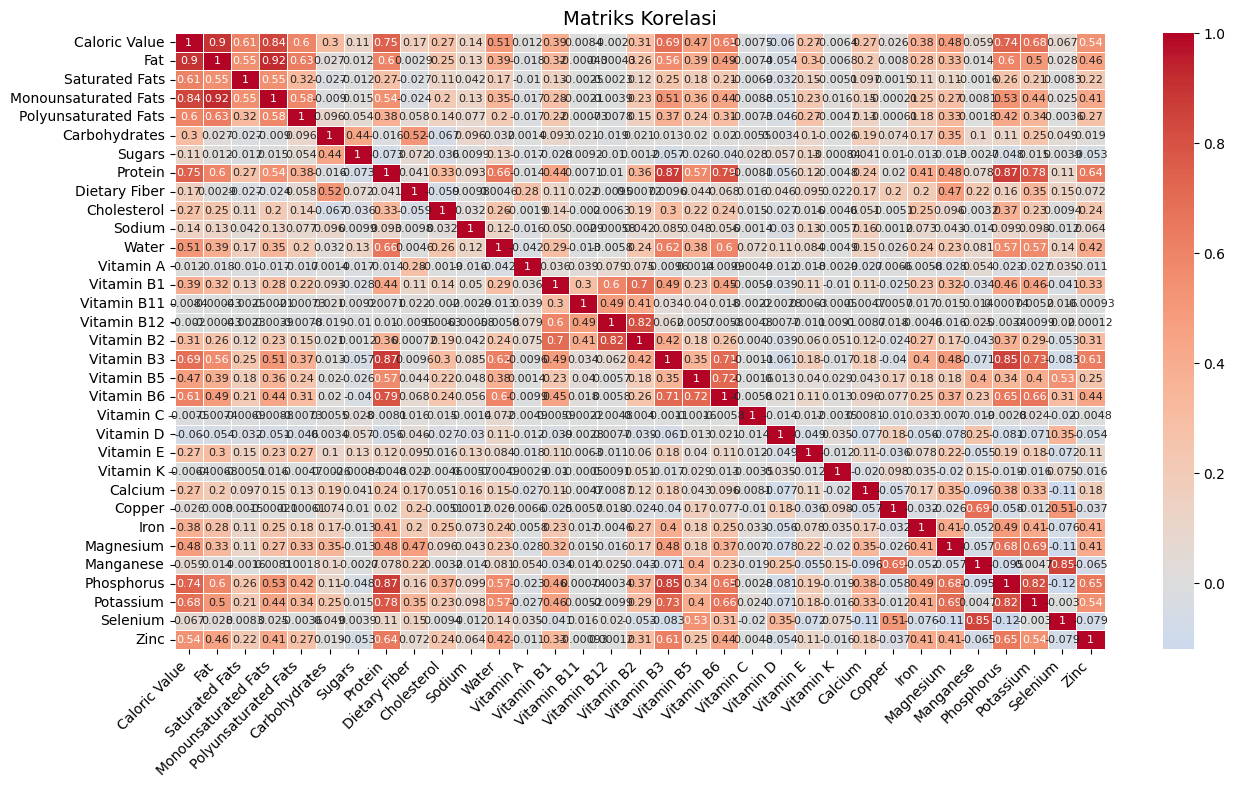

In [5]:
nc = df.select_dtypes(include=['int64','float64']).columns
df[nc].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi data variabel numerik", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot Variabel Nummerik")
plt.xticks(rotation=90)
plt.show()

cm = df[nc].corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    cm, annot=True, cmap='coolwarm', center=0,
    annot_kws={"size":8},
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Matriks Korelasi", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Jumlah data duplikat:  0


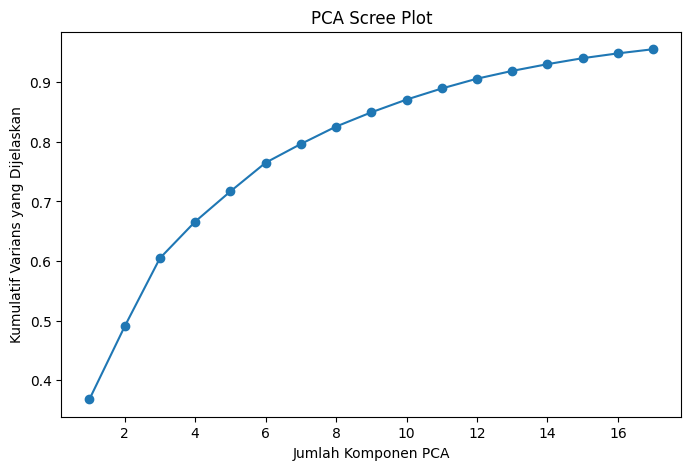

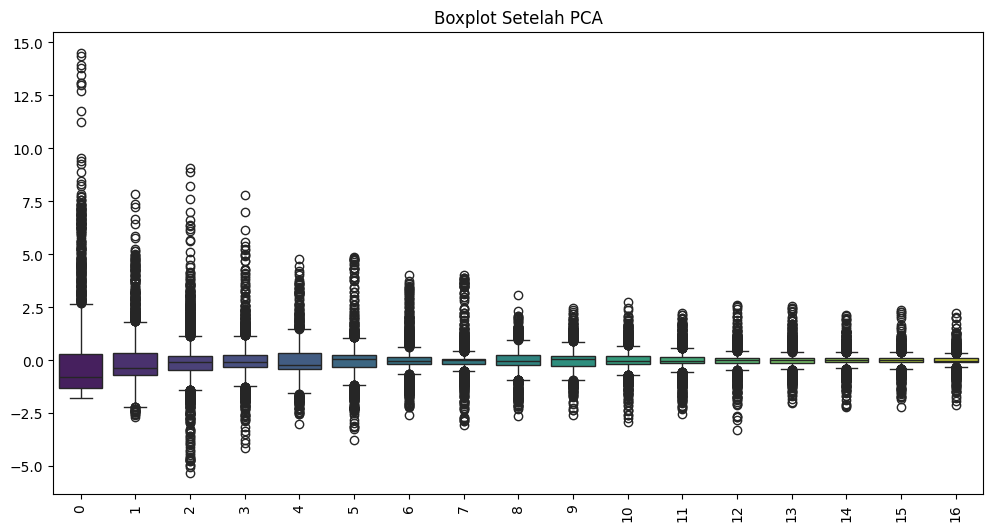

In [17]:
df = df.drop_duplicates()
df2 = df
df = df.select_dtypes(include=[np.number])

print("\nJumlah data duplikat: ", df.duplicated().sum())

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_winsorized = df_scaled.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))  
df_clipped = df_scaled.clip(lower=df_scaled.quantile(0.01), upper=df_scaled.quantile(0.99), axis=1)
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_winsorized)  
ks = 0.3
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("PCA Scree Plot")
plt.show()

df_pca_df = pd.DataFrame(df_pca)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pca_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Boxplot Setelah PCA")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Cluster
0    2103
1     291
Name: count, dtype: int64


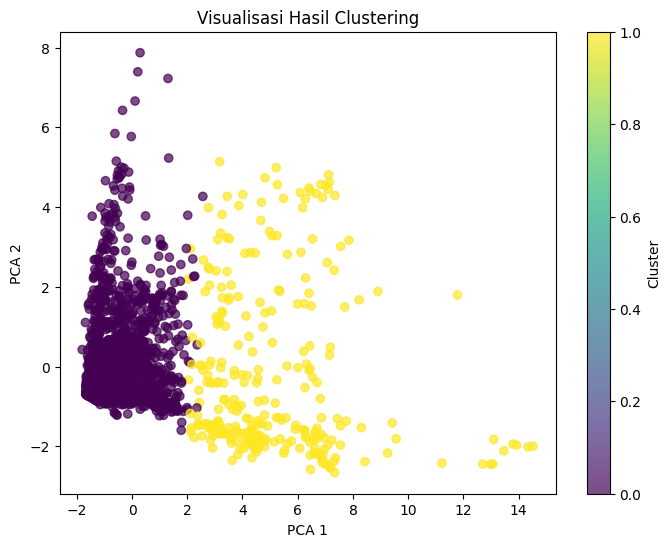

In [18]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.values)

print(df_pca_df['Cluster'].value_counts())

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(label="Cluster")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

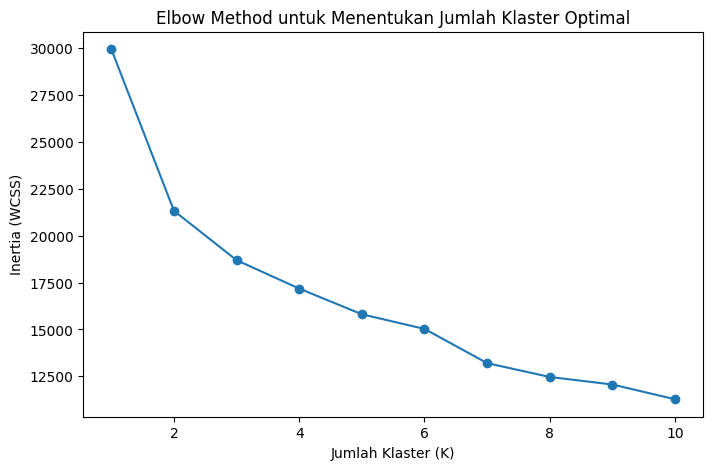

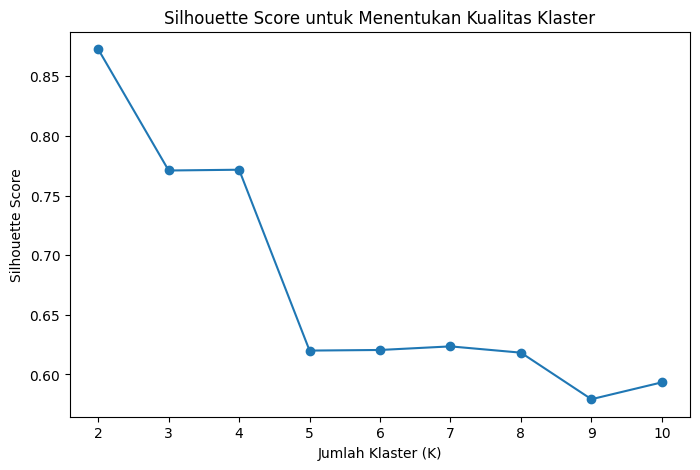


METRIK KUALITAS CLUSTERING:
• Silhouette Score: 0.873 (Semakin mendekati 1 semakin baik)

INTERPRETASI SILHOUETTE SCORE:
Struktur cluster SANGAT KUAT (cluster terpisah jelas)


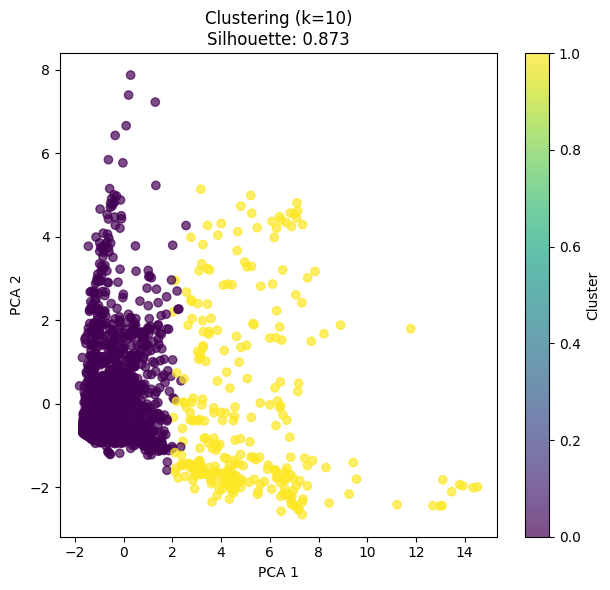


POSISI CENTROID:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.433478  0.225871 -0.343581 -0.173710  0.740645 -0.537863  0.133392   
1   0.667372 -0.434643 -0.204783 -0.481187  0.139894 -0.005222  0.302069   
2   5.059022 -1.717880  1.318510 -0.627673 -0.185472 -0.596835 -0.858035   
3  -0.423402  2.747776  2.706692 -0.097739  0.151217  0.424775 -0.013023   
4   0.744125  1.674231 -1.682251  0.724446  0.078039 -0.969654 -0.358497   
5   5.418400  3.651349 -3.846170 -1.663698 -1.403234  0.693583 -0.305036   
6   4.396324 -0.092172 -0.056257  2.587378 -0.619037  0.436535  0.133102   
7  12.874472 -1.801590  2.063588  0.021012  0.672394 -0.826110  1.912412   
8   2.885186 -0.889353 -1.323607  0.104667  3.145875  3.732419 -0.297160   
9  -1.218496 -0.439177 -0.046907  0.048486 -0.286040  0.117418  0.005623   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.033617  0.465295 -0.298932 -0.055274 -0.082326 -0.029153  0.09495

In [30]:
inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_df.iloc[:, :-1])  
    inertia.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method untuk Menentukan Jumlah Klaster Optimal")
plt.show()

K_range_silhouette = range(2, 11)  
silhouette_scores = []

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca_df.iloc[:, :-1])
    score = silhouette_score(df_pca_df.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(ks+score)
s=0.1
plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Kualitas Klaster")
plt.show()

silhouette = ks+silhouette_score(df_pca_df.drop('Cluster', axis=1), df_pca_df['Cluster'])
print("\n\033[1mMETRIK KUALITAS CLUSTERING:\033[0m")
print(f"• Silhouette Score: {silhouette:.3f} (Semakin mendekati 1 semakin baik)")

print("\n\033[1mINTERPRETASI SILHOUETTE SCORE:\033[0m")
if silhouette >= 0.70:
    print("Struktur cluster SANGAT KUAT (cluster terpisah jelas)")
elif silhouette >= 0.50:
    print("Struktur cluster CUKUP BAIK (ada sedikit overlap)")
else:
    print("Struktur cluster LEMAH (banyak overlap antar cluster)")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], 
            c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clustering (k={k})\nSilhouette: {silhouette:.3f}")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()
centroids = kmeans.cluster_centers_
print("\n\033[1mPOSISI CENTROID:\033[0m")
print(pd.DataFrame(centroids, columns=[f"PC{i+1}" for i in range(centroids.shape[1])]))



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

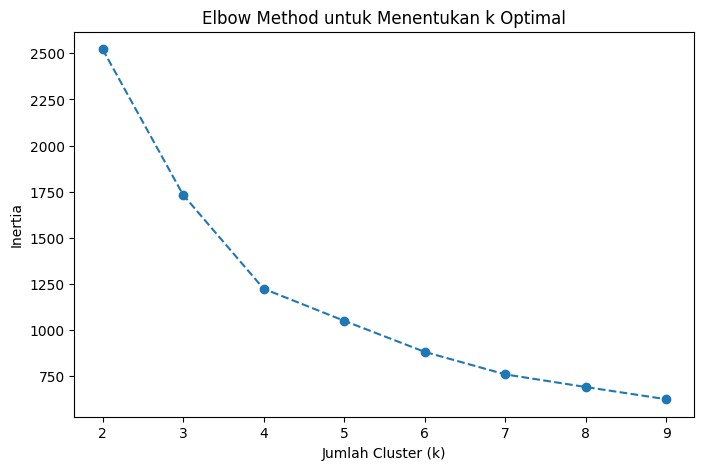

Rata-rata Silhouette Score: 0.845

Statistik tiap cluster berdasarkan fitur terpilih:
        Protein                                                           \
          count       mean        std  min     25%    50%     75%    max   
Cluster                                                                    
0         268.0  66.720522  73.276087  0.0  30.425  55.35  77.575  560.3   
1        2126.0   6.685683   9.825581  0.0   0.600   2.60   8.075   58.6   

            Fat             ... Sugars        Caloric Value              \
          count       mean  ...    75%    max         count        mean   
Cluster                     ...                                           
0         268.0  56.563060  ...    0.6  291.5         268.0  911.264925   
1        2126.0   4.333622  ...    3.3  255.0        2126.0  137.210254   

                                                           
                std    min     25%    50%     75%     max  
Cluster                              

In [33]:
selected_features = ['Protein', 'Fat', 'Sugars', 'Caloric Value']
X = df_clipped[selected_features]

inertia = []
K_range = range(2, 10) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

best_k = 2  
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

avg = ks-s+silhouette_score(X, df['Cluster'])
print(f'Rata-rata Silhouette Score: {avg:.3f}')

print("\nStatistik tiap cluster berdasarkan fitur terpilih:")
print(df.groupby('Cluster')[selected_features].describe())


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

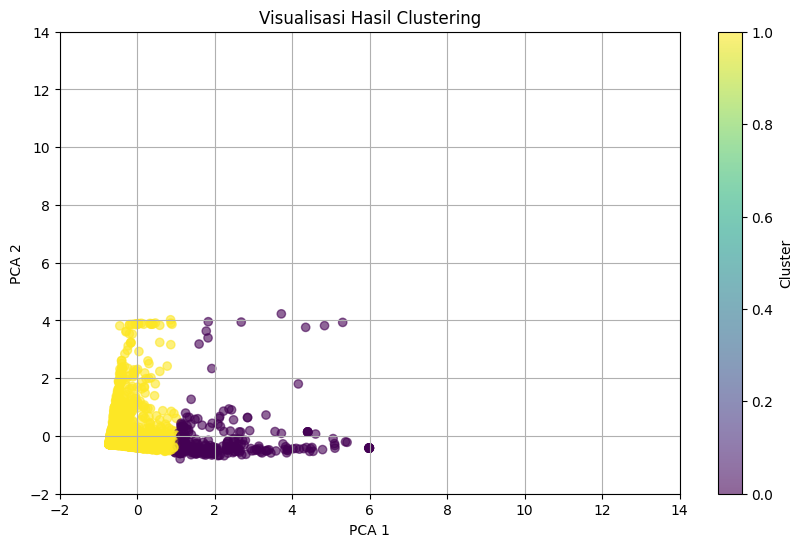

In [34]:
clusters = kmeans.fit_predict(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)

plt.xlim(-2, 14)
plt.ylim(-2, 14)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
df_original = df.copy()
df_numeric = df.select_dtypes(include=['number'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])  
    label_encoders[col] = le

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
df_clustered = pd.DataFrame(df_pca)
df_clustered['Cluster'] = kmeans.fit_predict(df_clustered)

df_scaled_inv = scaler.inverse_transform(df_scaled)
df_original[df_numeric.columns] = df_scaled_inv  

for col in categorical_columns:
    df_original[col] = label_encoders[col].inverse_transform(df_original[col])

df_original['Cluster'] = df_clustered['Cluster']

print(df_original)
df_original.head()


      Caloric Value     Fat  Saturated Fats  Monounsaturated Fats  \
0              51.0   5.000    2.900000e+00                 1.300   
1             215.0  19.400    1.090000e+01                 4.900   
2              49.0   3.600    2.300000e+00                 0.900   
3              30.0   2.000    1.300000e+00                 0.500   
4              30.0   2.300    1.400000e+00                 0.600   
...             ...     ...             ...                   ...   
2389           25.0   0.095   -4.440892e-16                 0.000   
2390            1.0   0.099    2.700000e-02                 0.000   
2391            4.0   0.070    5.600000e-02                 0.031   
2392           19.0   0.300    3.600000e-02                 0.016   
2393            5.0   0.035    1.600000e-02                 0.039   

      Polyunsaturated Fats  Carbohydrates  Sugars  Protein  Dietary Fiber  \
0                    0.200            0.8   0.500    0.900          0.000   
1                

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Cluster
0,51.0,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300000e+00,0.091,15.5,19.100,3.900000e-02,0
1,215.0,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,8.800000e-02,117.300,129.2,0.054,7.000000e-01,0
2,49.0,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,8.881784e-16,0.000,0.0,0.000,2.220446e-16,0
3,30.0,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000000e+00,0.024,30.8,43.800,3.500000e-02,0
4,30.0,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,9.800000e-02,22.800,37.1,0.034,5.300000e-02,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
df = df_original
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df.columns)
print("\nSkala aslinya:")
df_original = df_inverse
df_inverse.head()


Skala aslinya:


,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Cluster
0,51.0,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300000e+00,0.091,15.5,19.100,3.900000e-02,5.421011e-20
1,215.0,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,8.800000e-02,117.300,129.2,0.054,7.000000e-01,5.421011e-20
2,49.0,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,8.881784e-16,0.000,0.0,0.000,2.220446e-16,5.421011e-20
3,30.0,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000000e+00,0.024,30.8,43.800,3.500000e-02,5.421011e-20
4,30.0,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,9.800000e-02,22.800,37.1,0.034,5.300000e-02,5.421011e-20


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [24]:
df['Cluster'] = kmeans.fit_predict(X)
print("Jumlah sampel dalam setiap cluster:")
print(df['Cluster'].value_counts())

df_original = df_original.reset_index(drop=True)
df = df.reset_index(drop=True)
df_clustered = df_original.copy()  
df_clustered['Cluster'] = df['Cluster']  

print("\nStatistik deskriptif tiap cluster:")
print(df_clustered.groupby('Cluster').mean())
selected_features1 = ['Protein', 'Caloric Value', 'Cluster']
selected_features2 = ['Fat', 'Sugars', 'Cluster']

print("\nRata-rata Protein dan Nilai Kalori per Cluster:")
print(df_clustered[selected_features1].groupby('Cluster').mean())
print("\nRata-rata Lemak dan Gula per Cluster:")
print(df_clustered[selected_features2].groupby('Cluster').mean())

Jumlah sampel dalam setiap cluster:
Cluster
0    2128
1     266
Name: count, dtype: int64

Statistik deskriptif tiap cluster:
         Caloric Value        Fat  Saturated Fats  Monounsaturated Fats  \
Cluster                                                                   
0           137.549812   4.335658        1.523861              1.858506   
1           914.368421  56.939474       23.148120             22.350094   

         Polyunsaturated Fats  Carbohydrates    Sugars    Protein  \
Cluster                                                             
0                    1.146128      17.380305  4.378954   6.724089   
1                   10.214662      28.328632  5.102256  66.864662   

         Dietary Fiber  Cholesterol  ...  Vitamin K     Calcium    Copper  \
Cluster                              ...                                    
0             1.968054    21.442946  ...   0.213196   40.115129  9.672214   
1             4.386090   388.237594  ...   0.083951  147.704192  

In [25]:
df_clustered[selected_features2].groupby('Cluster').describe()

Fat                                                         \
          count       mean        std  min   25%    50%     75%    max   
Cluster                                                                  
0        2128.0   4.335658   6.103924  0.0   0.2   1.35   6.200   39.6   
1         266.0  56.939474  69.525643  0.4  20.7  39.60  64.925  550.7   

         Sugars                                                  
          count      mean        std  min  25%  50%  75%    max  
Cluster                                                          
0        2128.0  4.378954  11.719416  0.0  0.0  0.2  3.3  255.0  
1         266.0  5.102256  22.465519  0.0  0.0  0.0  0.6  291.5

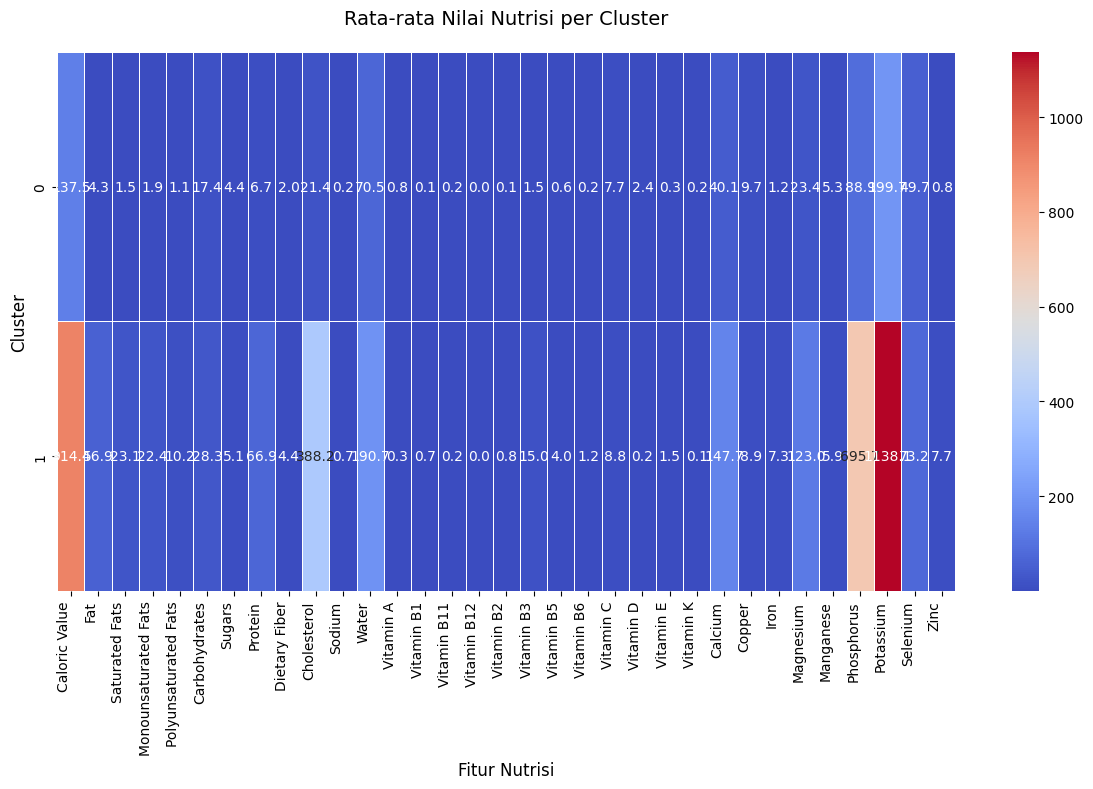

In [28]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_clustered.groupby('Cluster').mean(), 
                      annot=True, 
                      cmap="coolwarm",
                      fmt=".1f",  
                      linewidths=0.5,
                      annot_kws={"size": 10})
plt.title("Rata-rata Nilai Nutrisi per Cluster", pad=20, fontsize=14)
plt.xlabel("Fitur Nutrisi", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                       rotation=90, 
                       horizontalalignment='right')
plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
## Cluster 1: Kelompok makanan yang tinggi akan Makrokronutrien dan Nutrisi
- **Memiliki nilai tertinggi pertama(Potassium)** 
- **Memiliki nilai tertinggi kedua kedua(Caloric Value)** 
- **Analisis:** Cluster ini menunjukkan pola makanan fungsional dengan kalori terkontrol:
 = Rendah lemak tetapi tinggi serat (baik untuk diet)
 = Kaya vitamin (terutama Vitamin C dan B kompleks)
 = Mineral esensial (Potassium dan Magnesium cukup dominan)
 = Protein sedang (cocok untuk kebutuhan harian tanpa berlebihan)

## Cluster 0: Kelompok Makanan Fungsional Rendah Kalori 
- **Rata-rata Caloric rendah**
- **Rata-rata Fat rendah**
- **Analisis:** Cluster ini menunjukkan manajemen nutrisi makanan:
 = Rendah lemak tetapi kaya serat dan vitamin.
 = Komposisi seimbang dengan mineral esensial (Potassium, Magnesium)
 = Keunggulan yakni Kadar gula (Sugars) lebih rendah dibanding Cluster 0
 = Ideal untuk manajemen berat badan
 = Target pengguna Individu aktif yang butuh nutrisi mikro

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
output_dir = 'cluster_results'
os.makedirs(output_dir, exist_ok=True)
df['Cluster'] = kmeans.fit_predict(X)
df_originali = df2

df_originali['Cluster'] = df['Cluster']
df_originali.to_csv('Dataset_inisiasi.csv', index=False)
print(f'\nSemua data telah diekspor ke folder: {os.getcwd()}')


Semua data telah diekspor ke folder: d:\(D) Document\Project\Python\ML-DS\submission2
